### INSTALL MODULE EKSTERNAL YANG AKAN DIBUTUHKAN UNTUK PROSES KRIPTOGRAFI DAN STEGANOGRAFI (PYCRYPTODOME, DAN PILLOW)

In [1]:
%%time
pip install pycryptodome

Note: you may need to restart the kernel to use updated packages.
Wall time: 2.33 s


In [3]:
%%time
pip install pillow

Note: you may need to restart the kernel to use updated packages.
Wall time: 2.29 s


### IMPORT MODULE YANG DIBUTUHKAN

In [27]:
%%time
from secrets import token_bytes #LIBRARY INI OPSIONAL DAN HANYA DIGUNAKAN JIKA INGIN GENERATE KEY SECARA RANDOM
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad,unpad
from base64 import b64encode,b64decode
from typing import Iterable
import numpy as np
from PIL import Image
import hashlib as hash
import cv2 as cv
import matplotlib.pyplot as plt
#library secrets opsional dan hanya dipakai jika ingin generate key secara random
#library Crypto adalah library pycryptodome, berguna untuk proses enkripsi, dekripsi, padding, dan unpadding
#library base64 adalah library bawaan python, digunakan untuk decode dan encode ciphertext dan initial vector menjadi karakter yang lebih mudah dibaca
#library typing adalah library bawaan, yang digunakan untuk memproses sederet karakter/angka
#library numpy adalah library bawaan untuk melakukan operasi array
#library PIL (pillow) digunakan untuk manipulasi image

Wall time: 0 ns


### PROSES ENKRIPSI (DAN DEKRIPSI) TEKS

In [5]:
#kunci = token_bytes(16)

#contoh kata yang mengandung 16 huruf
#gunakan kunci token_bytes jika ingin menggunakan random generated key (ubah menjadi line aktif, jadikan kunci capekngodingbang menjadi comment)

In [6]:
def enkripsi(pesan):
  ciphering = AES.new(kunci, AES.MODE_CBC)
  ciphered_bytes = ciphering.encrypt(pad(pesan,AES.block_size))
  init_vector = b64encode(ciphering.iv).decode('utf-8')
  ciphered = b64encode(ciphered_bytes).decode('utf-8')
  return init_vector, ciphered

#fungsi enkripsi, menggunakan algoritma AES mode CBC

In [7]:
def dekripsi(init_vector,ciphered):
  iv=b64decode(init_vector)
  decry=b64decode(ciphered)
  deciphering = AES.new(kunci,AES.MODE_CBC,iv)
  plain = unpad(deciphering.decrypt(decry),AES.block_size)
  #raising exception
  return plain.decode('ascii')

#fungsi dekripsi

In [112]:
%%time
plained = input("Masukkan plaintext : ")
ky = input("Masukkan kunci 16 karakter : ")
kunci = str.encode(ky)
plained_bytes = str.encode(plained)
throwed = enkripsi(plained_bytes)

Masukkan plaintext : 
  @media print {
    .ms-editor-squiggles-container {
      display:none !important;
    }
  }
  .ms-editor-squiggles-container {
    all: initial;
  }Zhongli is a calm, reserved, and polite man, who holds an air of nostalgia. He knows much about Liyue's history and culture in part due to his time as the Geo Archon; like Venti, he has many experiences and memories, as he was a god well before The Seven even existed and one of the oldest still living in Teyvat. He holds philosophical ideas towards money and has great respect for Liyue's traditions, including those that have been forgotten or warped over time. Zhongli tends to be humble, being worried he comes off as a "bourgeois parasite.". Zhongli tends to forget about Mora in transactions, agreeing to spend large sums of it without having any Mora on hand and even taking "discounts" as granted despite being an obvious scam. He often ends up relying on his acquaintances for financial support, such as the Wangsheng

In [113]:
%%time
print("Initial Vector : ",throwed[0])
print("Hasil Enkripsi : ",throwed[1])

#hasil return dari fungsi enkripsi adalah tuple yang memiliki 2 nilai, yaitu initial vector dan ciphertext

Initial Vector :  MPQCwMEb0VsWsbYNMhj9TQ==
Hasil Enkripsi :  KAtXQ84eH7HZY6GQwGmpaAHL4JgX2QhU64FeFXgBwo2tfdA2yOoDfVpdGNfBiPju2i0pvNAeLd8/kdSpUDzT9l1jStninyHY+7ofo4+68fi8kP/+PsE0VpN1ZY3oLGCBXnfHBdWqzuGfKLkOXfwwYvx6ZySaq+00c6P6xAbDX5ddzp66s9MFLM3hHUmI/Ihe90vDtWX2wee1M8uXRgSG7rMZq8V5KsjJTW5iPm8mC4I2x6rErcC+K1wvu8077C2Wd6tOXaeoSUByqowqRbeRUpfIVvln6BUb3FCnfiMmxO7tCT19D3eyKnEGtRoxUZKOtX/EWFmaNu78AT27DpsqrhV5ArnR1YOpwJWFnjGEals3m9Ouj+/PBmocDzkFOpEx1uUR25+Cgy/LxpOcki+jmCGO9O7KLDV/Gae0AEQ4n7BfQeth5UXfgmqeo0JeAW5IT3/ZDH0VeoxlN7wTVux8IB4vwlb4kchoycwO9PJ2ms53c5WSfngY8A2/e1/u4txyzxqBZ5/TLc+sRiE5N1/t2PVqotj5anbE12Mo615SERrc0UBcKvvCU2jVnyFhAZtP8hPuBqJ3bFylft/rzM4LIAs9pQMm+K6Arazz2fMVMpl1N9wskPY9infPF4edu/2Q1a/aDILwT+k+X5fH4SQLEhthttbbe8DZ2c+BRIo9YfQRauIso6nlWVnzTqaalhDRBWmaZv2PH6CCdx2qBY/6bCD0CSmmH4kzDNx4qcM3s+aUVlvPtu+jUKkcftyutLreQuk1LetGiJZzrqzhBIq0QrQS/h9xrYZAAy8OKH2iKFNHwhC2oiOnzSZu16xMHBhHKbiuVTQkfPUIIdc0fj8Z/3QuVqRVg38fDiuhdNM3U3GrRwdq+Wdrhm8XSWIwL6rzHqA81w+cut7Ac5xEktsIjBST4z+TKMc83dkMDR8iews

In [114]:
%%time
dekrip = dekripsi(throwed[0],throwed[1])
print("Hasil dekripsi : ", dekrip)

#proses dekripsi melibatkan initial vector dan ciphertext

Hasil dekripsi :  Zhongli is a calm, reserved, and polite man, who holds an air of nostalgia. He knows much about Liyue's history and culture in part due to his time as the Geo Archon; like Venti, he has many experiences and memories, as he was a god well before The Seven even existed and one of the oldest still living in Teyvat. He holds philosophical ideas towards money and has great respect for Liyue's traditions, including those that have been forgotten or warped over time. Zhongli tends to be humble, being worried he comes off as a "bourgeois parasite.". Zhongli tends to forget about Mora in transactions, agreeing to spend large sums of it without having any Mora on hand and even taking "discounts" as granted despite being an obvious scam. He often ends up relying on his acquaintances for financial support, such as the Wangsheng Funeral Parlor or Childe. Although he works for Hu Tao, he does not like her childish behavior.
Wall time: 999 µs


### PROSES PENYISIPAN PESAN KE DALAM IMAGE (STEGANOGRAFI DOMAIN SPASIAL)

In [115]:
def bits_provider(message) -> Iterable[int]:
    for char in message:
        ascii_value = ord(char)
        for bit_position in range(8):
            power = 7 - bit_position
            yield 1 if ascii_value & (1 << power) else 0
            
#bits_provider adalah fungsi untuk mengubah character menjadi bentuk bit

In [116]:
def chars_provider(pixel_red_values) -> Iterable[str]:
    ascii_value = 0
    for i, pixel_red_value in enumerate(pixel_red_values):
        ascii_value_bit_position = 7 - i % 8
        if pixel_red_value & 1:
            ascii_value |= 1 << ascii_value_bit_position
        if ascii_value_bit_position == 0:
            char: str = chr(ascii_value)
            if not char.isprintable() and char != '\n':
                return

            yield char

            ascii_value = 0

#chars_provider adalah fungsi untuk menerjemahkan bit dari LSB red yang diperoleh dari decode_image menjadi character

In [117]:
def clear_low_order_bits(pixels) -> None:
    for row in range(pixels.shape[0]):
        for col in range(pixels.shape[1]):
            pixels[row, col, 0] &= ~1

In [118]:
def create_image(message: str, input_filename, output_filename: str) -> None:
    img = Image.open(input_filename)
    pixels = np.array(img)
    img.close()
    clear_low_order_bits(pixels)
    for i, bit in enumerate(bits_provider(message)):
        row = i // pixels.shape[1]
        col = i % pixels.shape[1]
        pixels[row, col, 0] |= bit
    out_img = Image.fromarray(pixels)
    out_img.save(output_filename)
    out_img.close()

#create_image membuka file cover image, lalu memperoleh array of pixel dari image tersebut
#setelah itu message diubah ke dalam bentuk bit menggunakan bits_provider, untuk kemudian disisipkan ke dalam pixel red
#jika loop sudah selesai, create_image akan membangun ulang image dari pixel yang telah dimodifikasi
#file stego image akan di-save dengan nama output_filename beserta ekstensinya

In [119]:
def decode_image(filename: str) -> str:
    img = Image.open(filename)
    result = ''.join(chars_provider(img.getdata(band=0)))
    img.close()
    return result

#decode_image akan membuka file stego image, lalu memperoleh LSB red dari image tersebut
#setelah itu, LSB red akan diteruskan ke chars_provider untuk diterjemahkan menjadi character
#setelah character dikembalikan dari chars_provider, decode_image menggabungkan character tersebut (join)
#jika sudah selesai, maka image di-close
#fungsi ini mengembalikan value berupa result yang merupakan gabungan character (string) ciphertext

In [120]:
pesan_tersisip = str(throwed[1])

#karena ciphertext berbentuk bytes, dan pesan yang disisipkan harus berbentuk string, maka ciphertext tersebut harus diubah
#ke dalam bentuk string terlebih dulu dan dimasukkan ke dalam variabel baru

In [121]:
%%time
create_image(pesan_tersisip, 'base_img.png','stego_img.png')

#create_image adalah fungsi untuk membangun image baru yang telah berubah LSB red nya
#create_image menerima 3 argumen
#argumen pertama adalah teks yang ingin disisipkan
#argumen kedua adalah nama file dan ekstensi yang menjadi cover image
#argumen ketiga adalah nama file dan ekstensi yang menjadi stego image

Wall time: 5.07 s


In [122]:
%%time
print('Hasil enkripsi : ', decode_image('stego_img.png'))
print('Plainteks : ',dekripsi(throwed[0],throwed[1]))
print('Key :', kunci.decode('ascii'))

#decode_image adalah fungsi untuk memperoleh LSB red dari stego image, untuk kemudian diterjemahkan ke bentuk character
#proses dekripsi sama seperti yang telah dilakukan di proses dekripsi sebelumnya
#kunci di-decode terlebih dahulu untuk mengubahnya menjadi bentuk string (jika tidak, maka output akan menjadi b'capekngodingbang')

Hasil enkripsi :  KAtXQ84eH7HZY6GQwGmpaAHL4JgX2QhU64FeFXgBwo2tfdA2yOoDfVpdGNfBiPju2i0pvNAeLd8/kdSpUDzT9l1jStninyHY+7ofo4+68fi8kP/+PsE0VpN1ZY3oLGCBXnfHBdWqzuGfKLkOXfwwYvx6ZySaq+00c6P6xAbDX5ddzp66s9MFLM3hHUmI/Ihe90vDtWX2wee1M8uXRgSG7rMZq8V5KsjJTW5iPm8mC4I2x6rErcC+K1wvu8077C2Wd6tOXaeoSUByqowqRbeRUpfIVvln6BUb3FCnfiMmxO7tCT19D3eyKnEGtRoxUZKOtX/EWFmaNu78AT27DpsqrhV5ArnR1YOpwJWFnjGEals3m9Ouj+/PBmocDzkFOpEx1uUR25+Cgy/LxpOcki+jmCGO9O7KLDV/Gae0AEQ4n7BfQeth5UXfgmqeo0JeAW5IT3/ZDH0VeoxlN7wTVux8IB4vwlb4kchoycwO9PJ2ms53c5WSfngY8A2/e1/u4txyzxqBZ5/TLc+sRiE5N1/t2PVqotj5anbE12Mo615SERrc0UBcKvvCU2jVnyFhAZtP8hPuBqJ3bFylft/rzM4LIAs9pQMm+K6Arazz2fMVMpl1N9wskPY9infPF4edu/2Q1a/aDILwT+k+X5fH4SQLEhthttbbe8DZ2c+BRIo9YfQRauIso6nlWVnzTqaalhDRBWmaZv2PH6CCdx2qBY/6bCD0CSmmH4kzDNx4qcM3s+aUVlvPtu+jUKkcftyutLreQuk1LetGiJZzrqzhBIq0QrQS/h9xrYZAAy8OKH2iKFNHwhC2oiOnzSZu16xMHBhHKbiuVTQkfPUIIdc0fj8Z/3QuVqRVg38fDiuhdNM3U3GrRwdq+Wdrhm8XSWIwL6rzHqA81w+cut7Ac5xEktsIjBST4z+TKMc83dkMDR8iewsaMaMBxhz1I6njoETAZzTQXD+5hZqpidhED5HsaAfRuM

In [123]:
hashcekstego = hash.md5(decode_image('stego_img.png').encode())
hashcek = hash.md5(throwed[1].encode())

In [124]:
%%time
print("Hash ciphertext dari stego : ",hashcekstego.hexdigest())
print("Hash ciphertext : ",hashcek.hexdigest())

Hash ciphertext dari stego :  378ad933514a55aafee131d4b95703bb
Hash ciphertext :  378ad933514a55aafee131d4b95703bb
Wall time: 0 ns


In [125]:
if  hashcekstego.hexdigest() == hashcek.hexdigest() :
  print("Hash teks enkripsi sama, tidak ditemukan perubahan data.")
else:
  print("Hash tidak sama")

Hash teks enkripsi sama, tidak ditemukan perubahan data.


In [126]:
from math import log10, sqrt

In [127]:
def PSNR(original, stego):
    mse = np.mean((original - stego) ** 2)
    if(mse == 0): 
        return 100
    pixel = 255.0
    psnr = 20 * log10(pixel / sqrt(mse))
    return psnr

In [128]:
original = cv.imread('base_img.png')
stego = cv.imread('stego_img.png', 1)
value = PSNR(original, stego)
print("PSNR sebesar : ", value, "dB")

PSNR sebesar :  55.6839068243988 dB


In [129]:
original_hist = cv.imread('base_img.png')
stego_hist = cv.imread('stego_img.png')
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

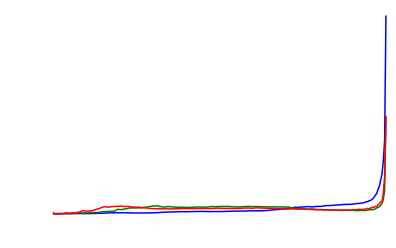

In [130]:
color = ('b','g','r')
plt.figure()
for i,col in enumerate(color):
    histr = cv.calcHist([original_hist],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

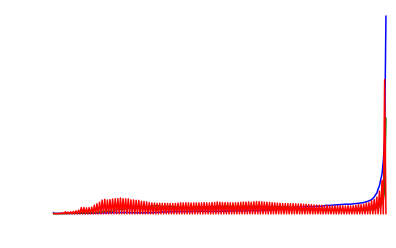

In [131]:
color = ('b','g','r')
plt.figure()
for i,col in enumerate(color):
    histr = cv.calcHist([stego_hist],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()